# Table of Contents
>### 01. Import Libraries and Dataframe
>### 02. Subsetting, Wrangling, and Cleaning
>### 03. Time-Series Analysis: Decomposition
>### 04. Testing for Stationarity
>### 05. Additional Time-Series
>### 06. Time Series for num_persons_killed
>### 07. Export Decomposition Data

# 01. Import Libraries and Dataframe

In [1]:
import quandl
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.
plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:

In [2]:
# Configure API key
quandl.ApiConfig.api_key= 'inbQhz763Qrzoz27rJQy'

In [3]:
# Project Pathname
path= r'/Users/alexmendrin/Documents/Career Foundry/Data Immersion/Achievement 6/Project Folder'

In [4]:
# Import dataframe
vc= pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'vehicle_collisions_cleaned.pkl'))

In [5]:
vc.shape

(927852, 19)

In [6]:
vc.head()

,date,time,borough,latitude,longitude,location,num_persons_injured,num_persons_killed,num_pedestrians_injured,num_pedestrians_killed,num_cyclist_injured,num_cyclist_killed,num_motorist_injured,num_motorist_killed,collision_id,contrib_factor_vehicle_1,contrib_factor_vehicle_2,vehicle_type_1,vehicle_type_2
0,9/11/21,9:35,BROOKLYN,40.67,-73.87,"(40.667202, -73.8665)",0,0,0,0,0,0,0,0,4456314,7.0,7.0,2.0,9.0
1,12/14/21,8:13,BROOKLYN,40.68,-73.92,"(40.683304, -73.917274)",0,0,0,0,0,0,0,0,4486609,7.0,7.0,9.0,9.0
2,12/14/21,17:05,NaN,40.71,-73.96,"(40.709183, -73.956825)",0,0,0,0,0,0,0,0,4486555,2.0,7.0,3.0,6.0
3,12/14/21,8:17,BRONX,40.87,-73.83,"(40.86816, -73.83148)",2,0,0,0,0,0,2,0,4486660,7.0,7.0,3.0,3.0
4,12/14/21,21:10,BROOKLYN,40.67,-73.90,"(40.67172, -73.8971)",0,0,0,0,0,0,0,0,4487074,2.0,7.0,3.0,9.0


In [7]:
# Fix borough value format
vc['borough']=vc['borough'].str.title()
vc.head()

,date,time,borough,latitude,longitude,location,num_persons_injured,num_persons_killed,num_pedestrians_injured,num_pedestrians_killed,num_cyclist_injured,num_cyclist_killed,num_motorist_injured,num_motorist_killed,collision_id,contrib_factor_vehicle_1,contrib_factor_vehicle_2,vehicle_type_1,vehicle_type_2
0,9/11/21,9:35,Brooklyn,40.67,-73.87,"(40.667202, -73.8665)",0,0,0,0,0,0,0,0,4456314,7.0,7.0,2.0,9.0
1,12/14/21,8:13,Brooklyn,40.68,-73.92,"(40.683304, -73.917274)",0,0,0,0,0,0,0,0,4486609,7.0,7.0,9.0,9.0
2,12/14/21,17:05,NaN,40.71,-73.96,"(40.709183, -73.956825)",0,0,0,0,0,0,0,0,4486555,2.0,7.0,3.0,6.0
3,12/14/21,8:17,Bronx,40.87,-73.83,"(40.86816, -73.83148)",2,0,0,0,0,0,2,0,4486660,7.0,7.0,3.0,3.0
4,12/14/21,21:10,Brooklyn,40.67,-73.90,"(40.67172, -73.8971)",0,0,0,0,0,0,0,0,4487074,2.0,7.0,3.0,9.0


In [8]:
vc.dtypes

date                         object
time                         object
borough                      object
latitude                    float64
longitude                   float64
location                     object
num_persons_injured           int64
num_persons_killed            int64
num_pedestrians_injured       int64
num_pedestrians_killed        int64
num_cyclist_injured           int64
num_cyclist_killed            int64
num_motorist_injured          int64
num_motorist_killed           int64
collision_id                  int64
contrib_factor_vehicle_1    float64
contrib_factor_vehicle_2    float64
vehicle_type_1              float64
vehicle_type_2              float64
dtype: object

In [9]:
# convert date datatype to datetime
vc['date']=pd.to_datetime(vc['date'], infer_datetime_format=True)

In [10]:
vc.dtypes

date                        datetime64[ns]
time                                object
borough                             object
latitude                           float64
longitude                          float64
location                            object
num_persons_injured                  int64
num_persons_killed                   int64
num_pedestrians_injured              int64
num_pedestrians_killed               int64
num_cyclist_injured                  int64
num_cyclist_killed                   int64
num_motorist_injured                 int64
num_motorist_killed                  int64
collision_id                         int64
contrib_factor_vehicle_1           float64
contrib_factor_vehicle_2           float64
vehicle_type_1                     float64
vehicle_type_2                     float64
dtype: object

# 02. Subsetting, Wrangling, and Cleaning

#### Dataset is a compilation of data regarding accidents from 2012 to 2022, there are no significant years in which accidents would have increased or descreased based on an even that was occurring at the time.

In [11]:
# vc_2: new dataset including the date and the total number of people injured in accidents on that day
vc_2= vc.groupby('date')['num_persons_injured'].sum()

In [12]:
vc_2.head()

date
2012-07-27    0
2012-08-01    1
2012-09-25    0
2012-10-22    0
2016-04-16    0
Name: num_persons_injured, dtype: int64

In [13]:
vc_2.shape

(2203,)

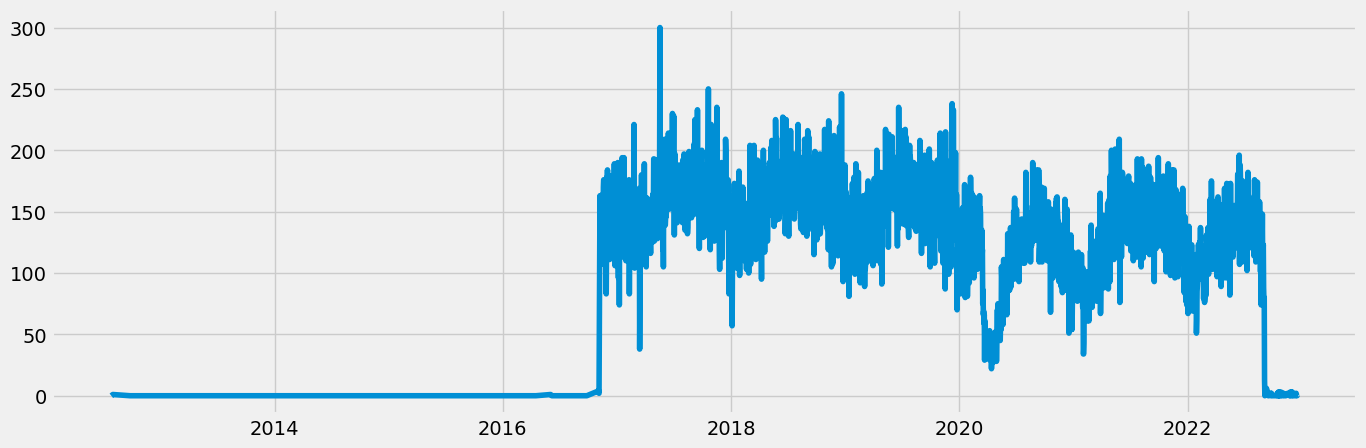

In [14]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(vc_2)

In [15]:
# check for missing values
vc_2.isnull().sum()

0

In [16]:
# check for duplicates
dups= vc_2.duplicated()
dups.sum()

2000

#### I'm not sure why there are so many cases of duplicated data points in my set, and the graph looks very strange. First, you are unable to see the dates listed on the time-series, and then it is very clustered. Maybe that is simply how the plot will look because the number of injuries can vary largely from day to day.

# 03. Time-Series Analysis: Decomposition

In [17]:
vc_2.head()

date
2012-07-27    0
2012-08-01    1
2012-09-25    0
2012-10-22    0
2016-04-16    0
Name: num_persons_injured, dtype: int64

In [18]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(vc_2, model='additive', period= 365)

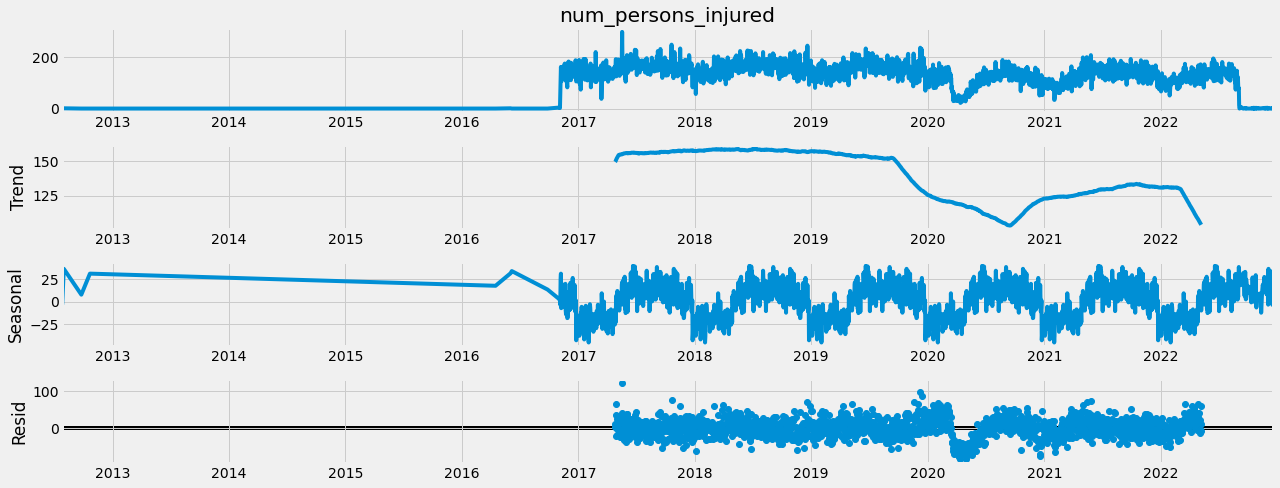

In [19]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

# Plot the separate components

decomposition.plot()
plt.show()

# 04. Testing for stationarity

In [20]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(vc_2['num_persons_injured'])

KeyError: 'num_persons_injured'

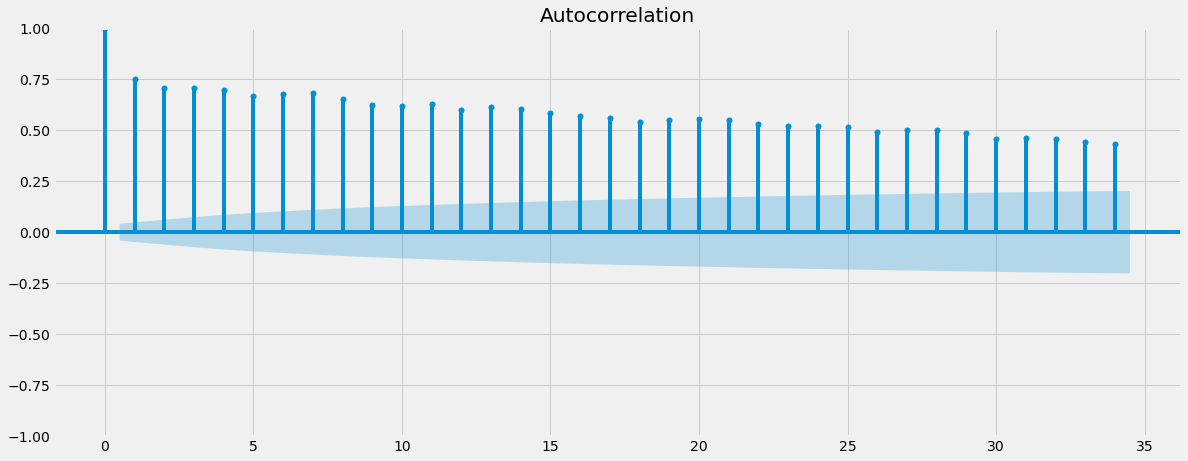

In [21]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(vc_2)
plt.show()

# 05. Additional Time Series

### Subsetting, wrangling, and cleaning time-series data

In [22]:
vc_2.head()

date
2012-07-27    0
2012-08-01    1
2012-09-25    0
2012-10-22    0
2016-04-16    0
Name: num_persons_injured, dtype: int64

In [23]:
# Reset index so 'date' column can be used as a filter
vc_3=vc_2.reset_index()
vc_3.head()

,date,num_persons_injured
0,2012-07-27,0
1,2012-08-01,1
2,2012-09-25,0
3,2012-10-22,0
4,2016-04-16,0


In [24]:
vc_sub= vc_3.loc[(vc_3['date']>= '2017-01-01') & (vc_3['date']< '2022-06-01')]
vc_sub.shape

(1977, 2)

In [25]:
vc_sub.head()

,date,num_persons_injured
67,2017-01-01,162
68,2017-01-02,109
69,2017-01-03,190
70,2017-01-04,127
71,2017-01-05,96


In [26]:
# set 'date' column as the index

from datetime import datetime

vc_sub['datetime'] = pd.to_datetime(vc_sub['date']) # Create a datetime column from "Date.""
vc_sub = vc_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
vc_sub.drop(['date'], axis=1, inplace=True) # Drop the "Date" column.
vc_sub.head()

,num_persons_injured
datetime,
2017-01-01,162
2017-01-02,109
2017-01-03,190
2017-01-04,127
2017-01-05,96


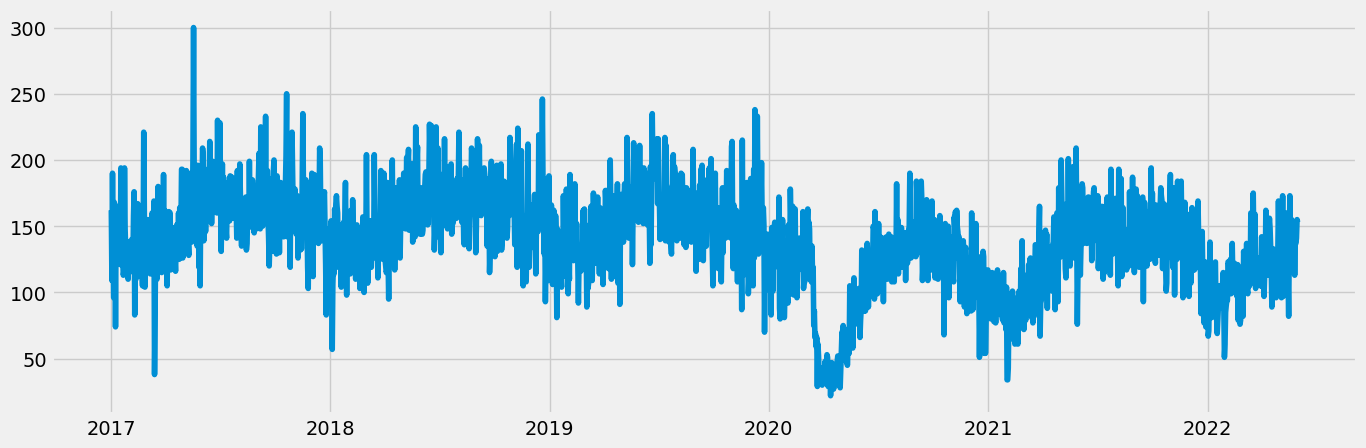

In [28]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(vc_sub)

### Time-series analysis: decompostion

In [29]:
# Decompose the time series using an additive model

decomposition2 = sm.tsa.seasonal_decompose(vc_sub, model='additive')

In [30]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

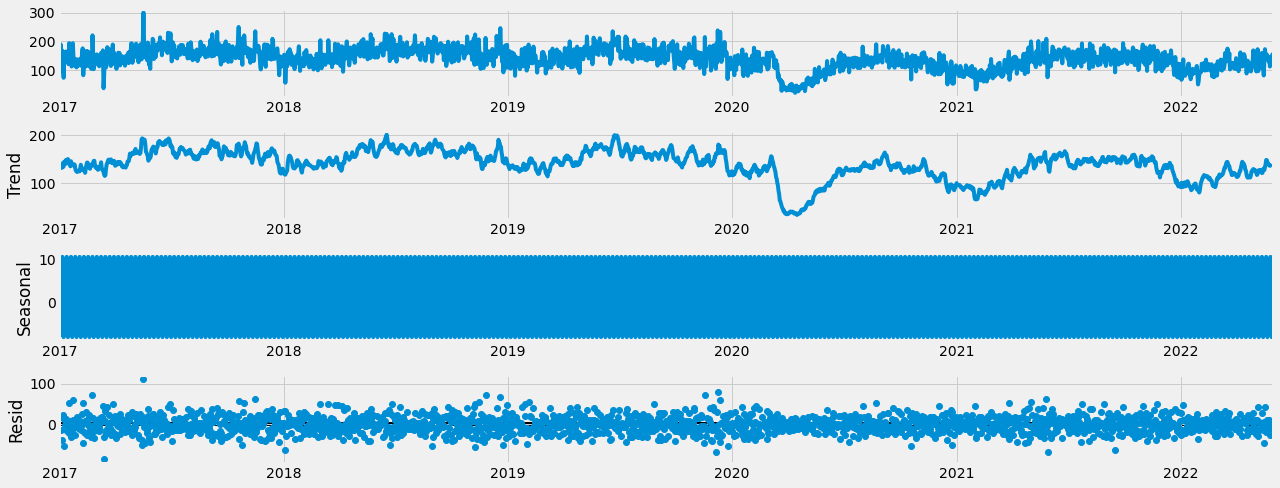

In [31]:
# Plot the separate components

decomposition2.plot()
plt.show()

In [32]:
decomposition2.trend

datetime
2017-01-01           NaN
2017-01-02           NaN
2017-01-03           NaN
2017-01-04    144.285714
2017-01-05    131.714286
                 ...    
2022-05-27    137.000000
2022-05-28    140.285714
2022-05-29           NaN
2022-05-30           NaN
2022-05-31           NaN
Name: trend, Length: 1977, dtype: float64

In [33]:
decomposition2.seasonal

datetime
2017-01-01    -8.119627
2017-01-02    -3.605138
2017-01-03     0.064918
2017-01-04    -2.475236
2017-01-05     2.131147
                ...    
2022-05-27    10.554653
2022-05-28     1.449283
2022-05-29    -8.119627
2022-05-30    -3.605138
2022-05-31     0.064918
Name: seasonal, Length: 1977, dtype: float64

In [34]:
decomposition2.resid

datetime
2017-01-01          NaN
2017-01-02          NaN
2017-01-03          NaN
2017-01-04   -14.810479
2017-01-05   -37.845433
                ...    
2022-05-27    -9.554653
2022-05-28    -4.734997
2022-05-29          NaN
2022-05-30          NaN
2022-05-31          NaN
Name: resid, Length: 1977, dtype: float64

### Testing for Stationarity

In [35]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(vc_sub['num_persons_injured'])

Dickey-Fuller Stationarity test:
Test Statistic                   -2.933289
p-value                           0.041612
Number of Lags Used              20.000000
Number of Observations Used    1956.000000
Critical Value (1%)              -3.433698
Critical Value (5%)              -2.863019
Critical Value (10%)             -2.567557
dtype: float64


#### Test Stat is not smaller than critical values, therefore we cannot reject our null hypothesis of the presence of a unit root. The data is not stationary.

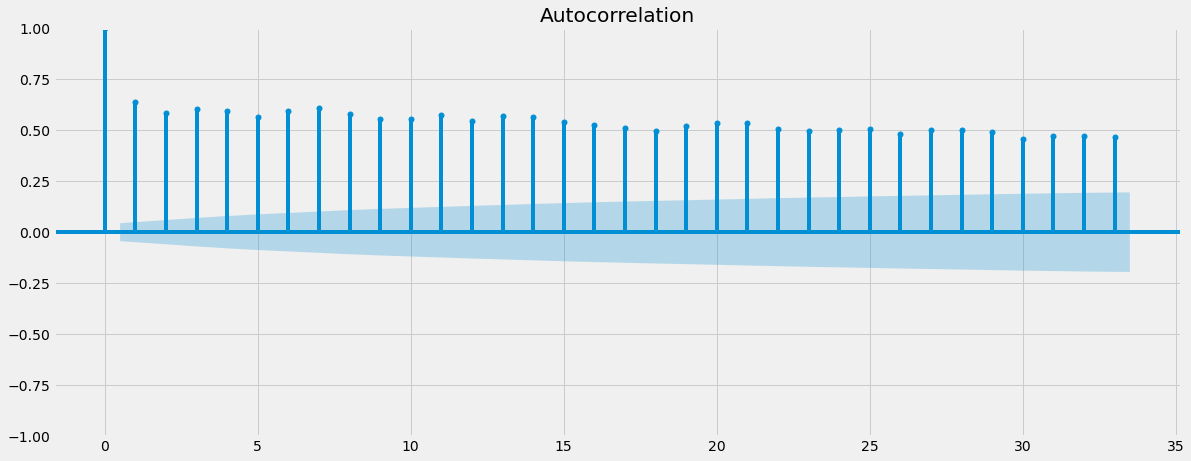

In [36]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(vc_sub)
plt.show()

#### There are many lags that are correlated with each other, indicating the data is non-stationary.

### Stationarizing Data

In [37]:
vc_diff= vc_sub - vc_sub.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [38]:
vc_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [39]:
vc_diff.head()

,num_persons_injured
datetime,
2017-01-02,-53.0
2017-01-03,81.0
2017-01-04,-63.0
2017-01-05,-31.0
2017-01-06,72.0


In [40]:
vc_diff.columns

Index(['num_persons_injured'], dtype='object')

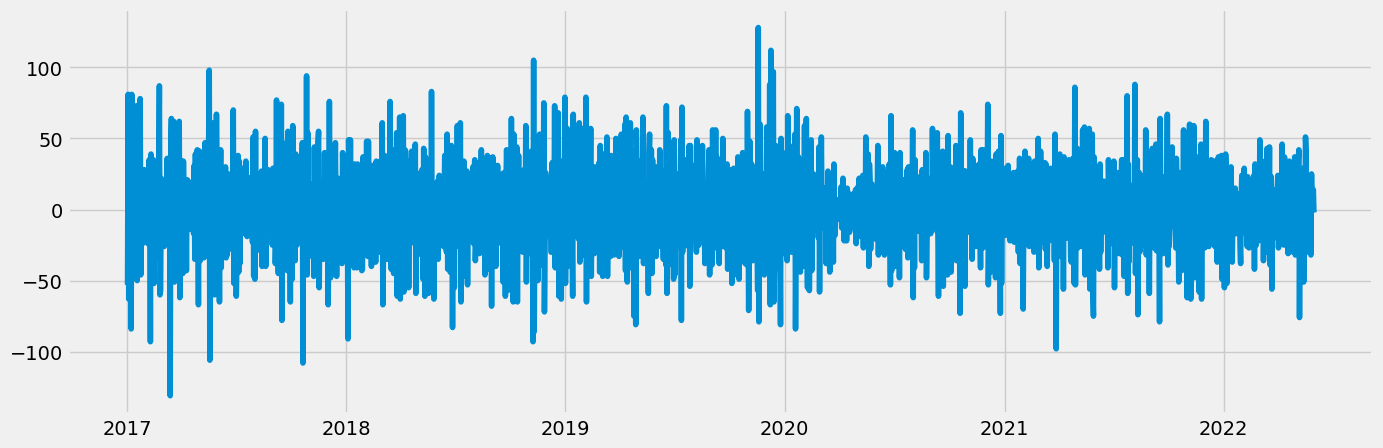

In [41]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(vc_diff)

In [42]:
dickey_fuller(vc_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -1.415940e+01
p-value                        2.093867e-26
Number of Lags Used            1.900000e+01
Number of Observations Used    1.956000e+03
Critical Value (1%)           -3.433698e+00
Critical Value (5%)           -2.863019e+00
Critical Value (10%)          -2.567557e+00
dtype: float64


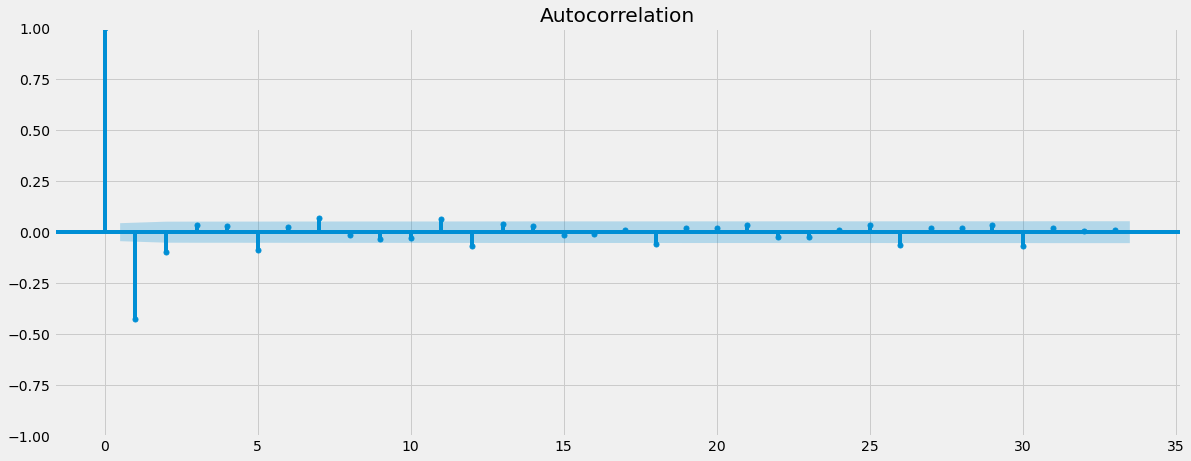

In [43]:
plot_acf(vc_diff)
plt.show()

#### In the Dickey-Fuller test the test stat< critical values, and on the autocorrelation graph there is only 1 lag above the confidance interval. Based on these results, the data is now stationary.

# 06. Time Series for num_persons_killed

In [53]:
# vc_2: new dataset including the date and the total number of people injured in accidents on that day
vc_4= vc.groupby('date')['num_persons_killed'].sum()
vc_4.head()

date
2012-07-27    0
2012-08-01    0
2012-09-25    0
2012-10-22    0
2016-04-16    0
Name: num_persons_killed, dtype: int64

In [54]:
# Reset index so 'date' column can be used as a filter
vc_4=vc_4.reset_index()
vc_4.head()

,date,num_persons_killed
0,2012-07-27,0
1,2012-08-01,0
2,2012-09-25,0
3,2012-10-22,0
4,2016-04-16,0


In [56]:
# set 'date' column as the index

from datetime import datetime

vc_4['datetime'] = pd.to_datetime(vc_4['date']) # Create a datetime column from "Date.""
vc_4 = vc_4.set_index('datetime') # Set the datetime as the index of the dataframe.
vc_4.drop(['date'], axis=1, inplace=True) # Drop the "Date" column.
vc_4.head()

,num_persons_killed
datetime,
2012-07-27,0
2012-08-01,0
2012-09-25,0
2012-10-22,0
2016-04-16,0


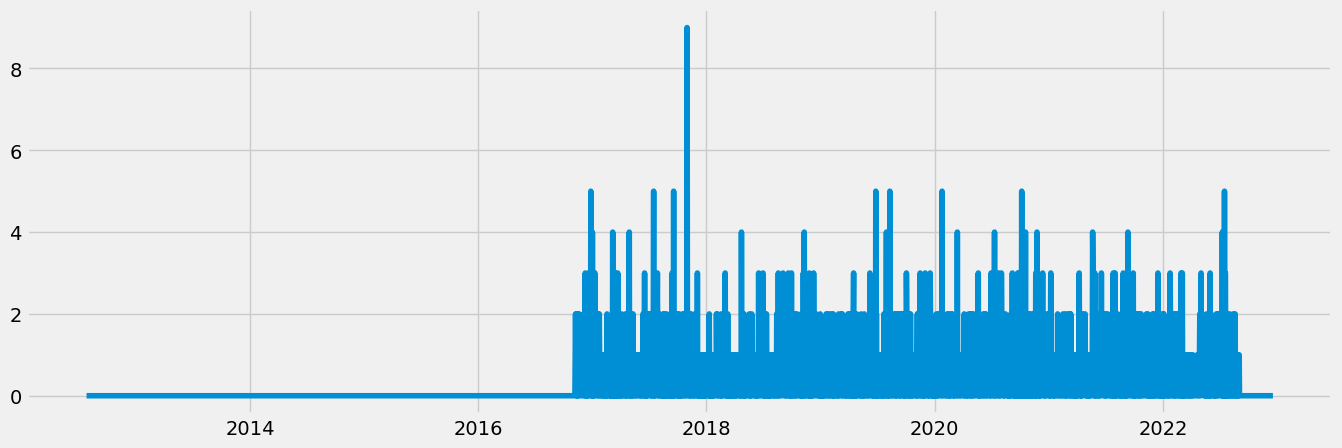

In [57]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(vc_4)

In [59]:
# Decompose the time series using an additive model

decomposition3 = sm.tsa.seasonal_decompose(vc_4, model='additive', period=365)

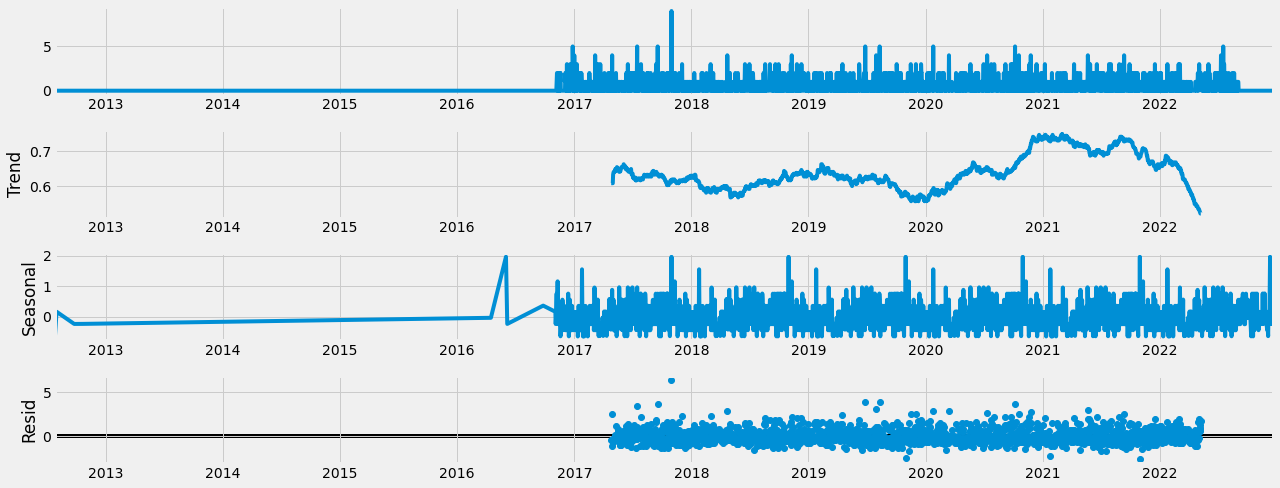

In [60]:
from pylab import rcParams # This will define a fixed size for all special charts.
rcParams['figure.figsize'] = 18, 7

# Plot the separate components

decomposition3.plot()
plt.show()

# 07. Export Decomposition Data

In [44]:
# export complete dataset decomposition- number of persons injured
decomposition.trend.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'decomp_trend.csv'))
decomposition.seasonal.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'decomp_seasonal.csv'))
decomposition.resid.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'decomp_resid.csv'))

In [45]:
# export subset decomposition- number of persons injured
decomposition2.trend.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'decomp2_trend.csv'))
decomposition2.seasonal.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'decomp2_seasonal.csv'))
decomposition2.resid.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'decomp2_resid.csv'))

In [61]:
# export complete dataset decomposition- number of persons killed
decomposition3.trend.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'decomp_trend_killed.csv'))
decomposition3.seasonal.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'decomp_seasonal_killed.csv'))
decomposition3.resid.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'decomp_resid_killed.csv'))